# import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('sign11.jpg',0)
img1 = cv2.imread('sign11.jpg')#,cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
imgcolor = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)
imgthresh = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)

imgcontour = cv2.imread('sign11.jpg',cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(im,cmap = 'gray')

<IPython.core.display.Javascript object>


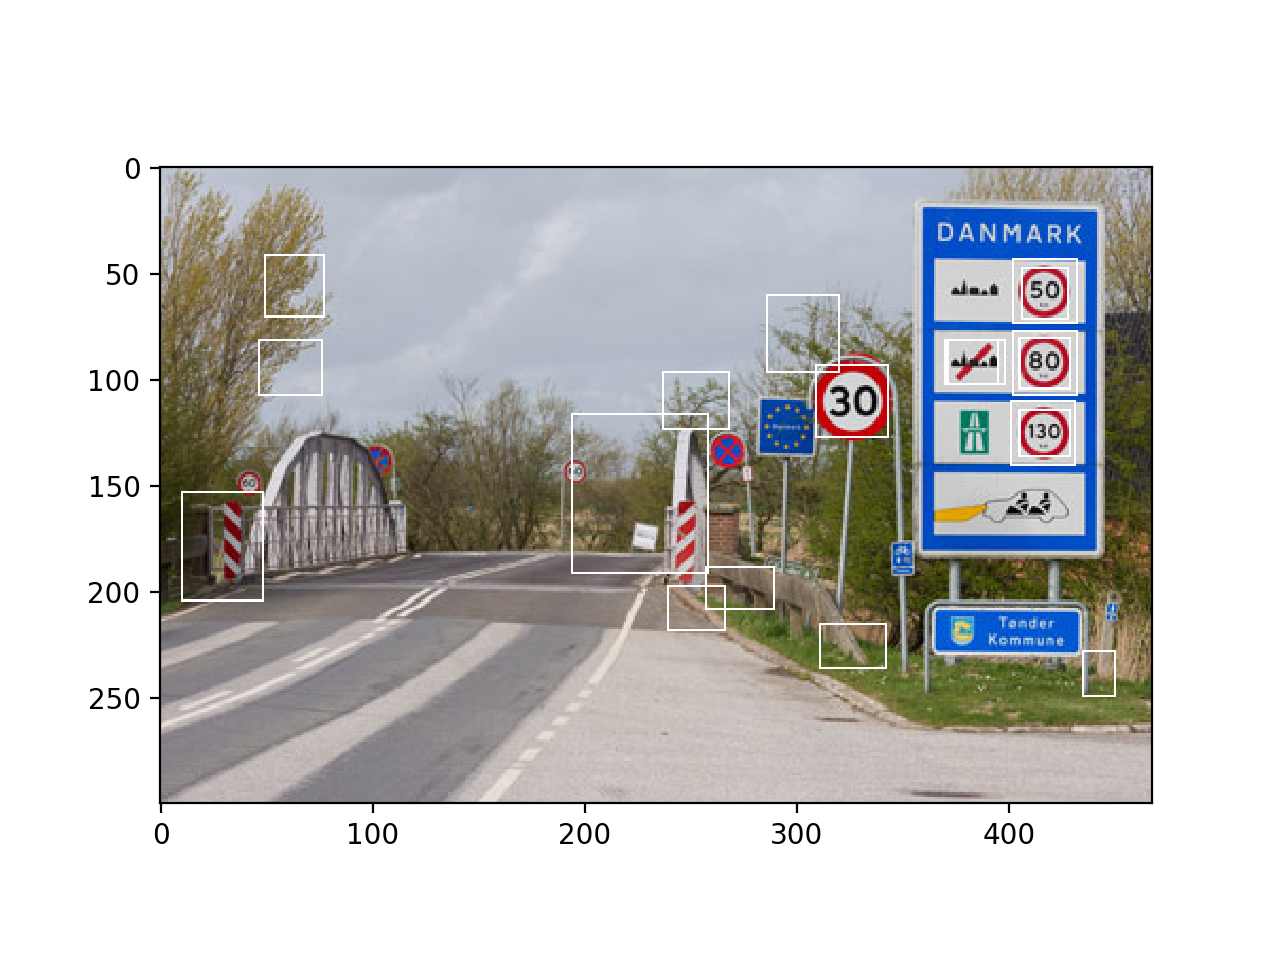

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('sign11.jpg',0)

img1 = cv2.imread('sign11.jpg')#,cv2.COLOR_BGR2RGB)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

imgcolor = img1.copy()

imgthresh = img1.copy()

imgcontour = img1.copy()
img = cv2.GaussianBlur(np.uint8(img), (3,3), 0)
sigma = 0.33
v = np.median(img)
# apply automatic Canny edge detection using the computed median
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edges = cv2.Canny(img,lower,upper)

plt.imshow(imgcolor)

In [64]:
im2, contours, hierarchy = cv2.findContours(np.uint8(edges),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

358

In [65]:
conts = []
perLen = 0.035
perLen2 = 0.2
percolor = 0
pd=0.1

for i in range(len(contours)):
    
#     print(i)
    x,y,w,h = cv2.boundingRect(contours[i])
    cA = w*h
    #if(w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and h!=0 and w/h>=0.5 and w/h<=2):
    pcolor = checkcolor(imgcolor[max(0,int(y - h*pd)) : min(int(y+h+h*pd),img.shape[0]-1) , max(0,int(x-w*pd)) : min((int(x+w+w*pd),img.shape[1]-1))])
#     print('hello')

    

    if(pcolor>percolor and h!=0 and w/h>=0.555 and w/h<=1.8 and w>=img.shape[0]*perLen and h>=img.shape[1]*perLen and (w<=img.shape[0]*perLen2 and h<=img.shape[1]*perLen2)):
        conts.append([x,y,w,h,cA,i])
        print("Color per is - ",pcolor)
        cv2.rectangle(imgcontour,((max(0,int(x-w*pd))),max(0,int(y - h*pd))),(min(int(x+w+w*pd),img.shape[1]-1),min(int(y+h+h*pd),img.shape[0]-1)),(255,255,255),1)
    
        
    
    
conts = sorted(conts, reverse = True, key = lambda value : (value[4]))
# conts[:10]
    
conts = np.array(conts)

Color per is -  0.0761904761904762
Color per is -  0.03379416282642089
Color per is -  0.008818342151675485
Color per is -  0.0125
Color per is -  0.09700722394220847
Color per is -  0.08354166666666667
Color per is -  0.2859848484848485
Color per is -  0.2859848484848485
Color per is -  0.22555555555555556
Color per is -  0.22555555555555556
Color per is -  0.009557945041816009
Color per is -  0.3546712802768166
Color per is -  0.3546712802768166
Color per is -  0.08531746031746032
Color per is -  0.029487179487179487
Color per is -  0.2708333333333333
Color per is -  0.06292517006802721
Color per is -  0.2708333333333333
Color per is -  0.1922222222222222
Color per is -  0.1922222222222222
Color per is -  0.021241830065359478
Color per is -  0.2821969696969697
Color per is -  0.2821969696969697
Color per is -  0.2111111111111111
Color per is -  0.2111111111111111
Color per is -  0.1268472906403941


In [66]:
len(conts)

26

In [16]:
threshcopy = 

NameError: name 'thresh' is not defined

In [67]:
plt.imshow(imgcontour)

In [7]:
img.shape

(396, 650)

In [8]:
max(0,int(y - h*pd)) , min(int(y+h+h*pd),img.shape[1]-1) , max(0,int(x-w*pd)) , min((int(x+w+w*pd),img.shape[0]-1))

(267, 272, 398, 395)

In [9]:
x,y,x+w,y+h

(399, 268, 412, 272)

ValueError: zero-size array to reduction operation minimum which has no identity

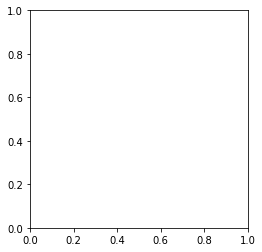

In [8]:
plt.imshow(imgcolor[max(0,int(y - h*pd)) : min(int(y+h+h*pd),img.shape[1]-1) , max(0,int(x-w*pd)) : min((int(x+w+w*pd),img.shape[0]-1))])

In [68]:
shape = "unidentified"

for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)
    print(len(approx))
    
    

4
5
4
7
7
8
8
7
5
7
6
7
6
4
8
4
6
6
7
2
8
7
6
6
6
5


<IPython.core.display.Javascript object>


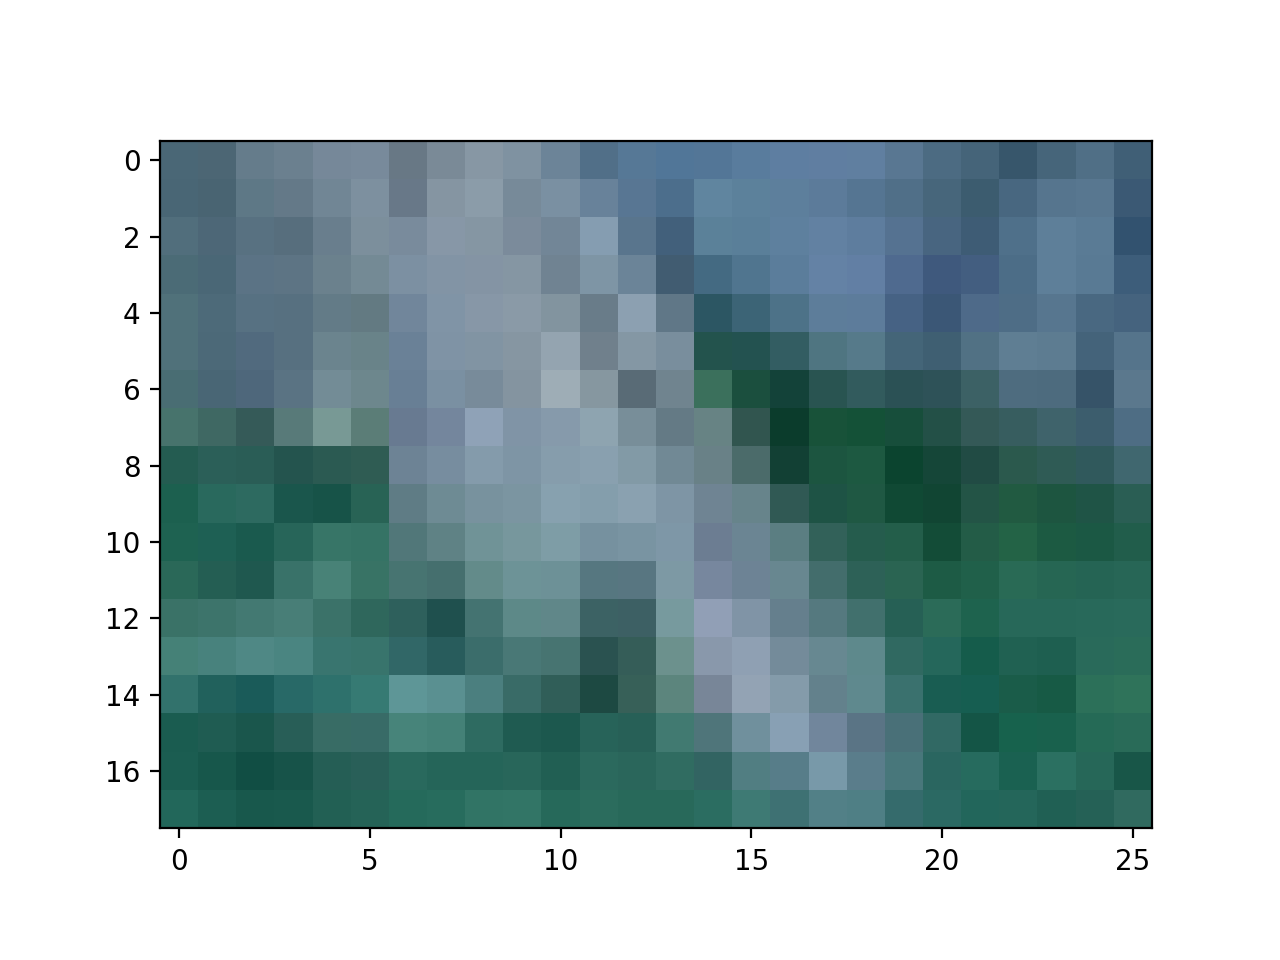

In [55]:
ind = 10
plt.imshow(imgcolor[  conts[ind,1] : conts[ind,1] + conts[ind,3] , conts[ind,0] : conts[ind,0] + conts[ind,2]  ])

In [69]:
# load json and create model
from keras.models import model_from_json
json_file = open('trafficsign1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("trafficsign1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model

Loaded model from disk


In [70]:
def pre(X):
  #Convert to grayscale, e.g. single channel Y
    X = 0.299 * X[:, :,  0] + 0.587 * X[:, :,  1] + 0.114 * X[:, :,  2]
  
#   print(X)
#   X = cv2.cvtColor(X,cv2.COLOR_BGR2YCR_CB)
  
#   X = X[:][:][:][0]
  #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

#   for i in range(X.shape[0]):
#       with warnings.catch_warnings():
#           warnings.simplefilter("ignore")
#           X[i] = exposure.equalize_adapthist(X[i])
#       print_progress(i + 1, X.shape[0])

 

  # Add a single grayscale channel
#   X = X.reshape(X.shape + (1,)) 
  
    return X

<IPython.core.display.Javascript object>


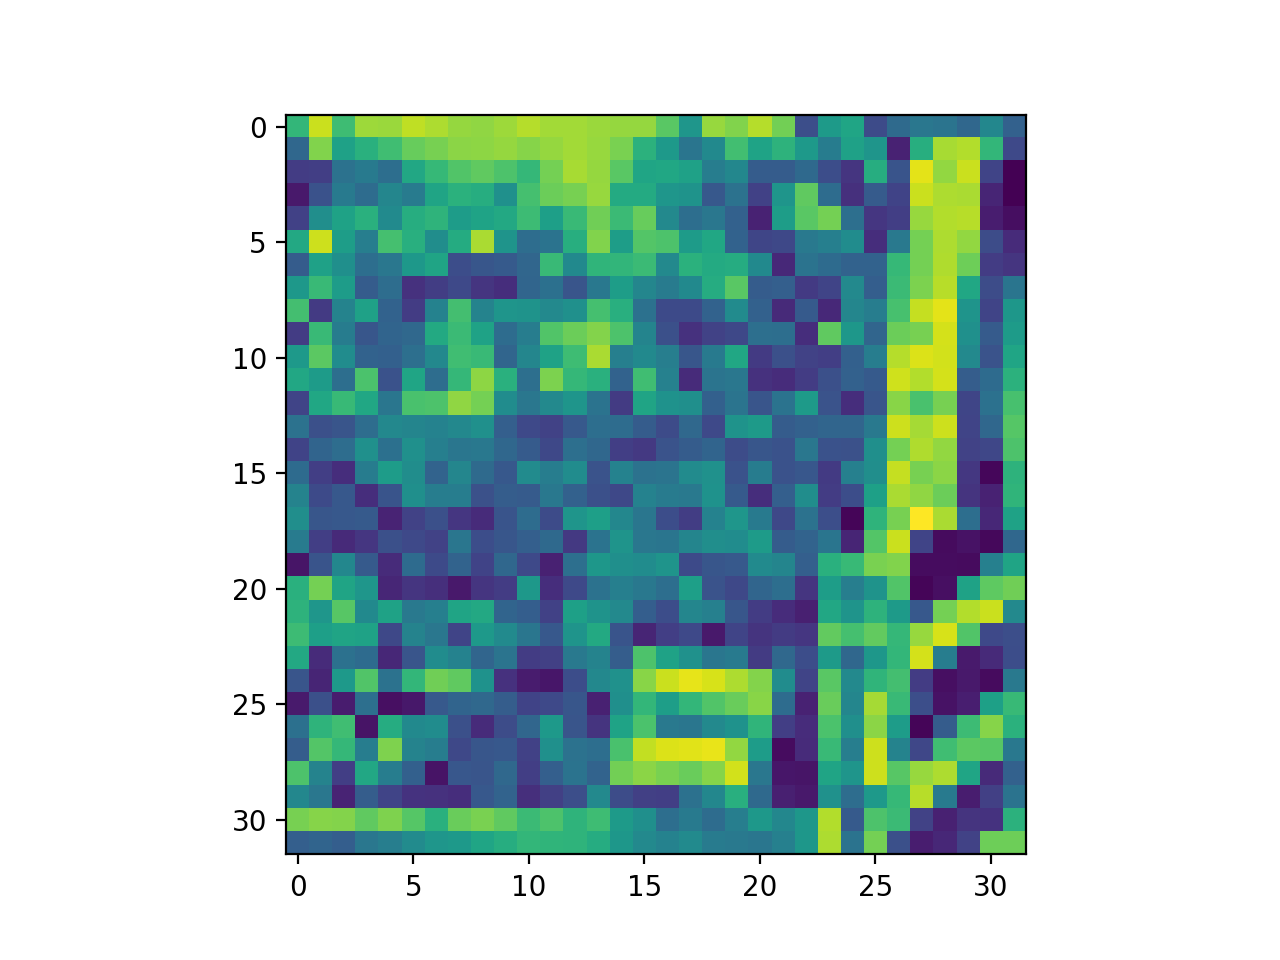

40 - 0


<IPython.core.display.Javascript object>


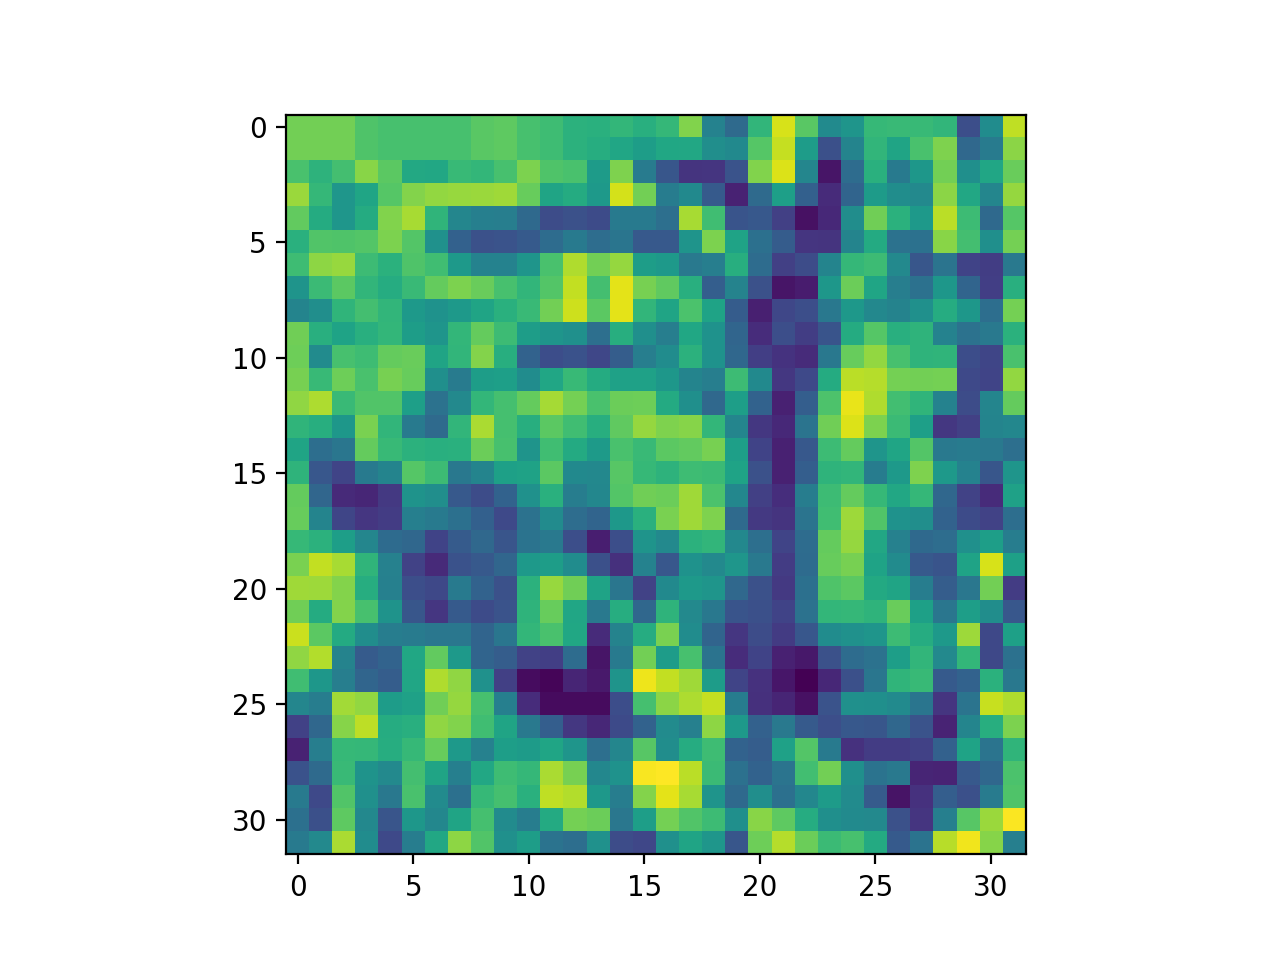

13 - 2


<IPython.core.display.Javascript object>


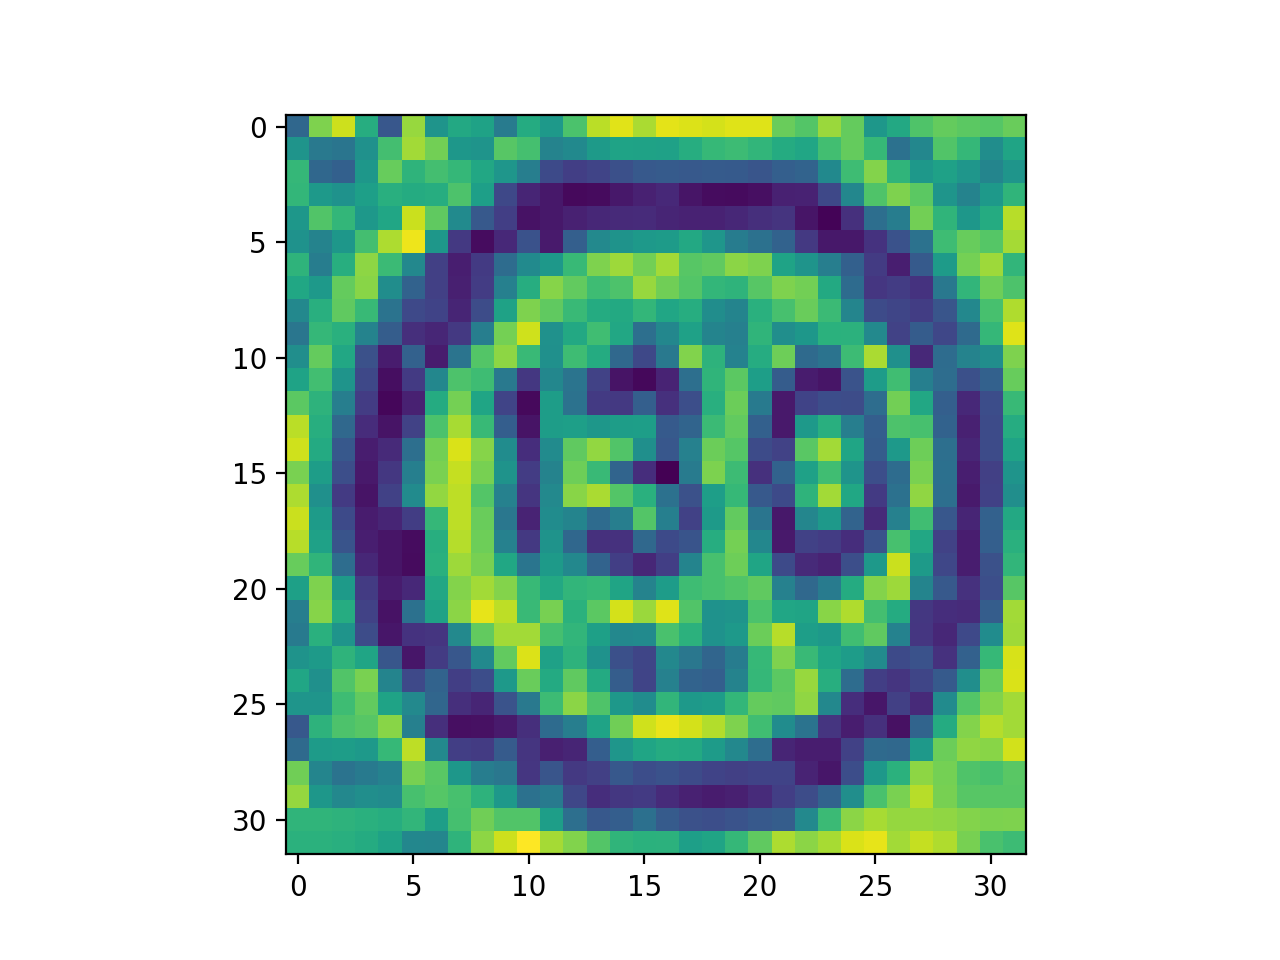

40 - 5


<IPython.core.display.Javascript object>


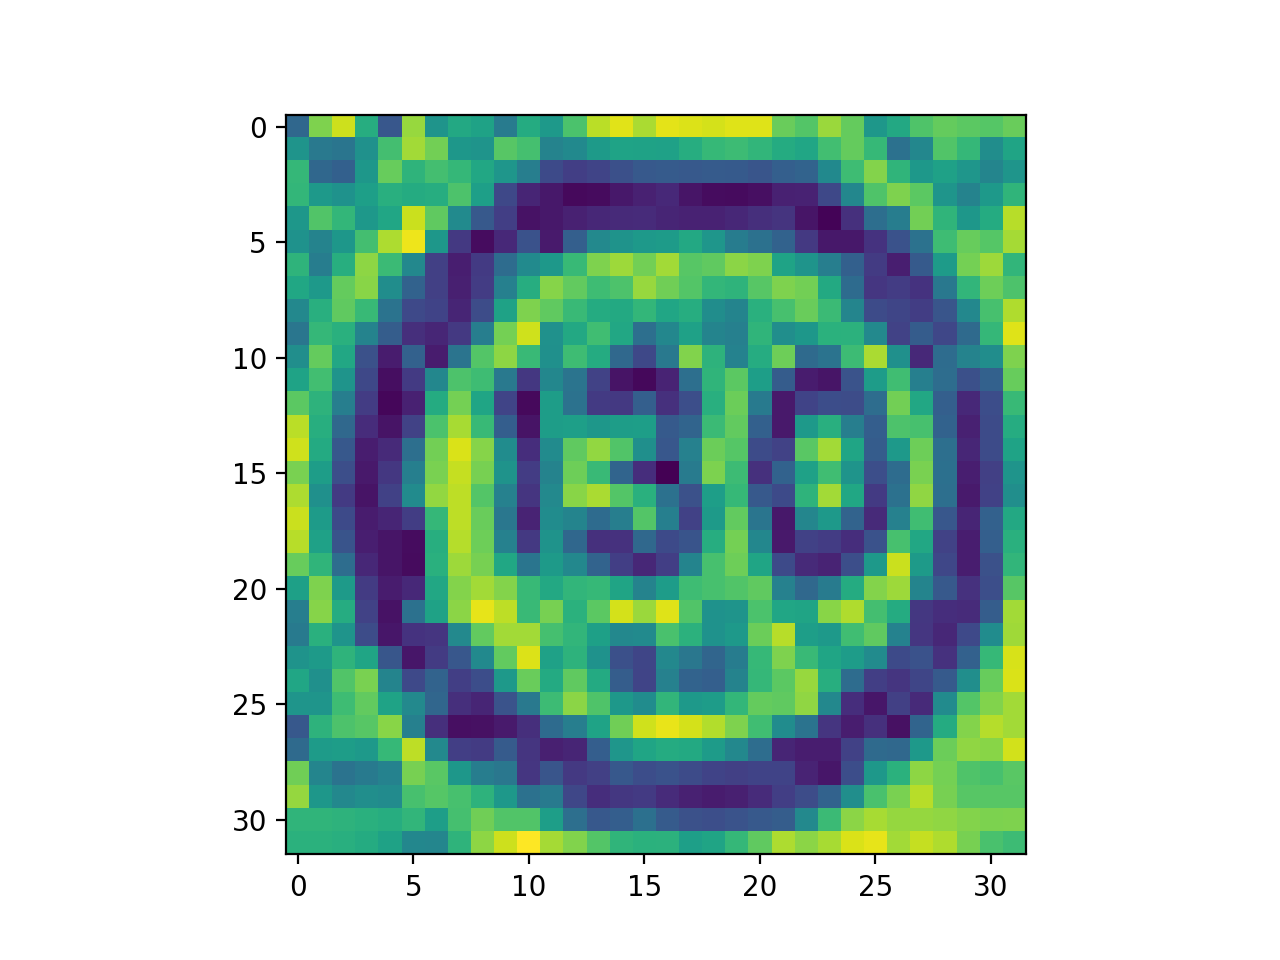

40 - 6


<IPython.core.display.Javascript object>


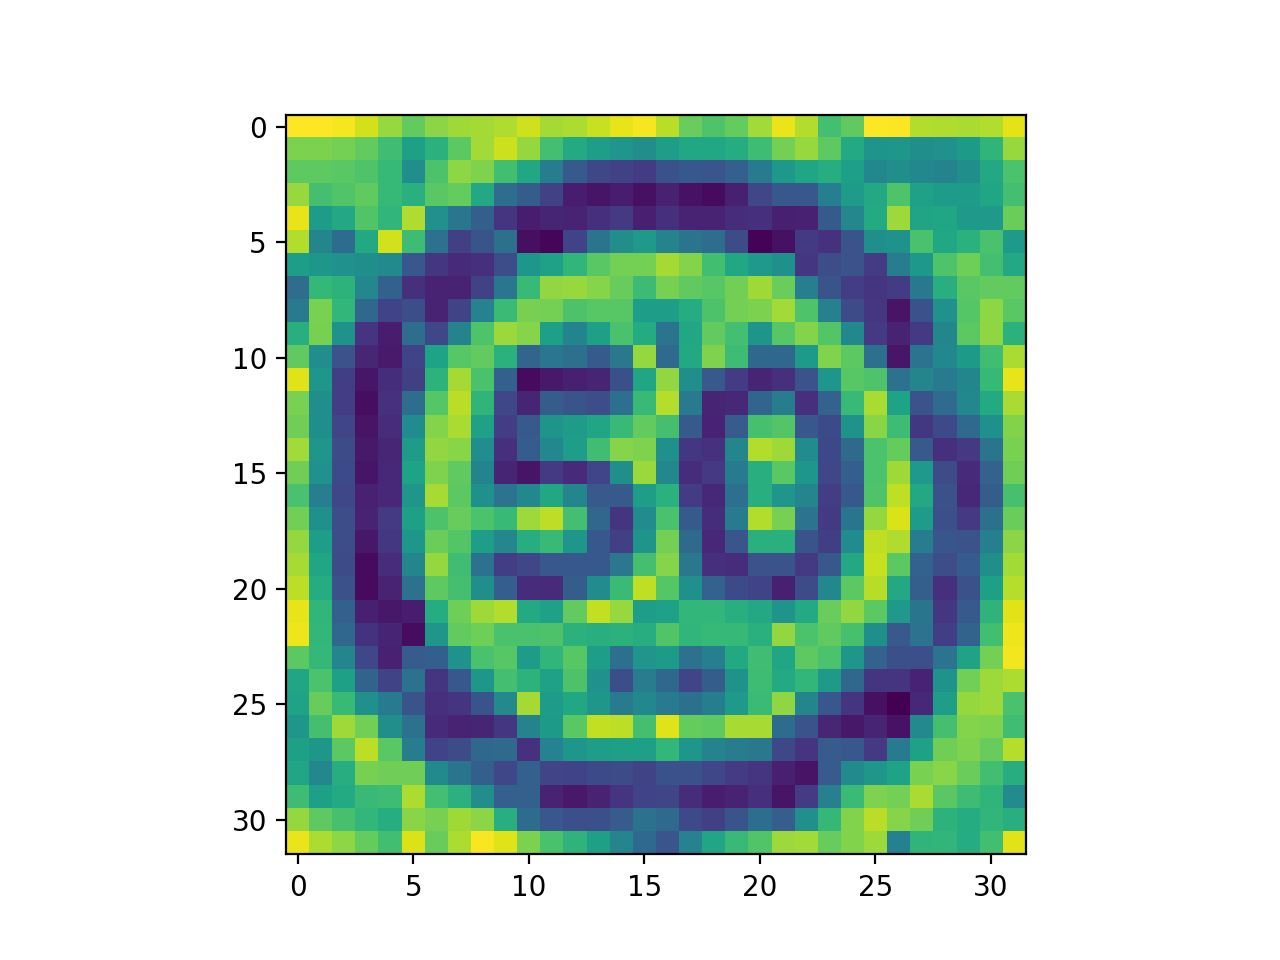

2 - 10


<IPython.core.display.Javascript object>


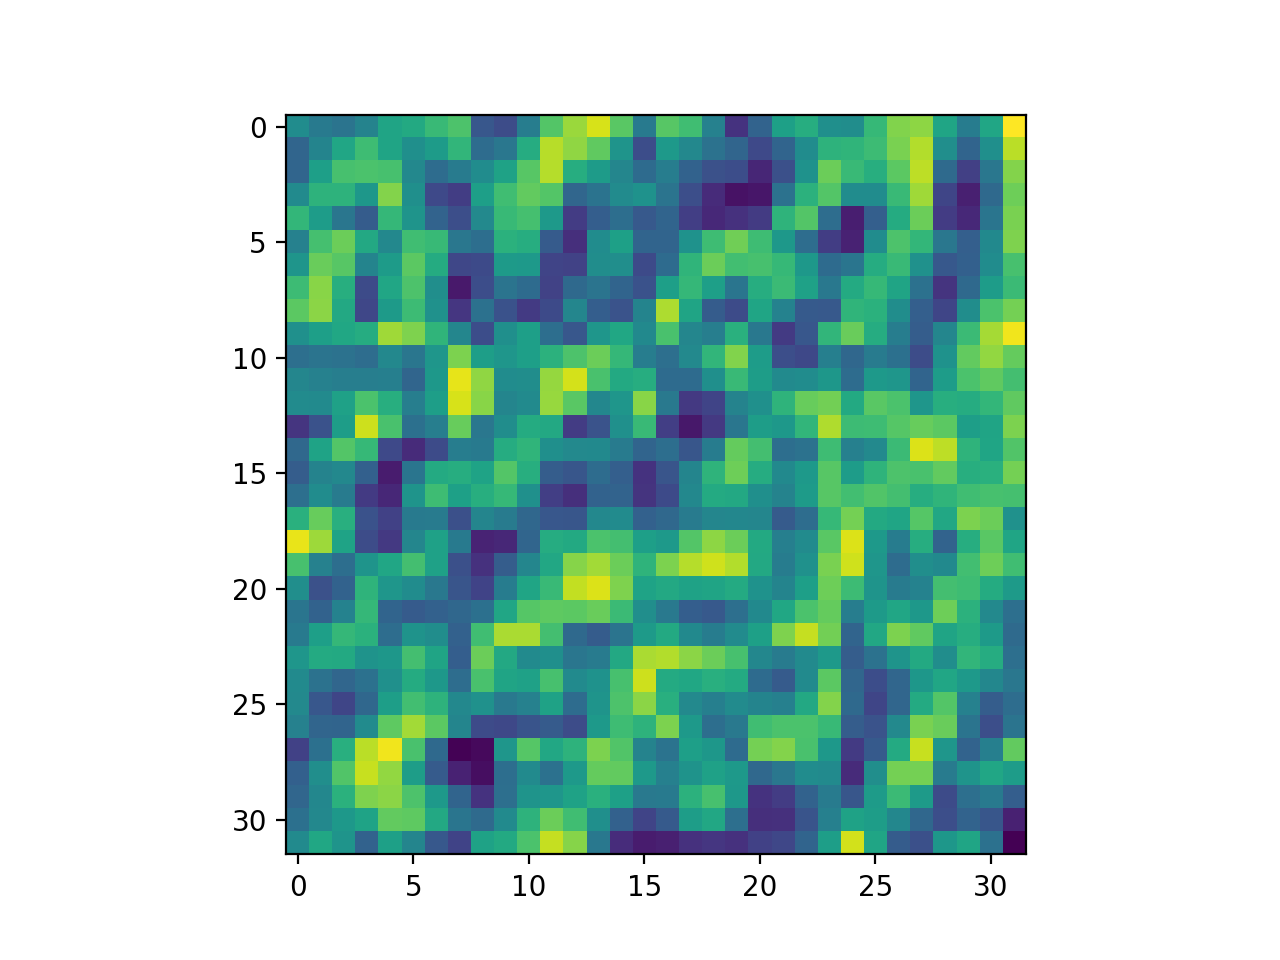

12 - 12


<IPython.core.display.Javascript object>


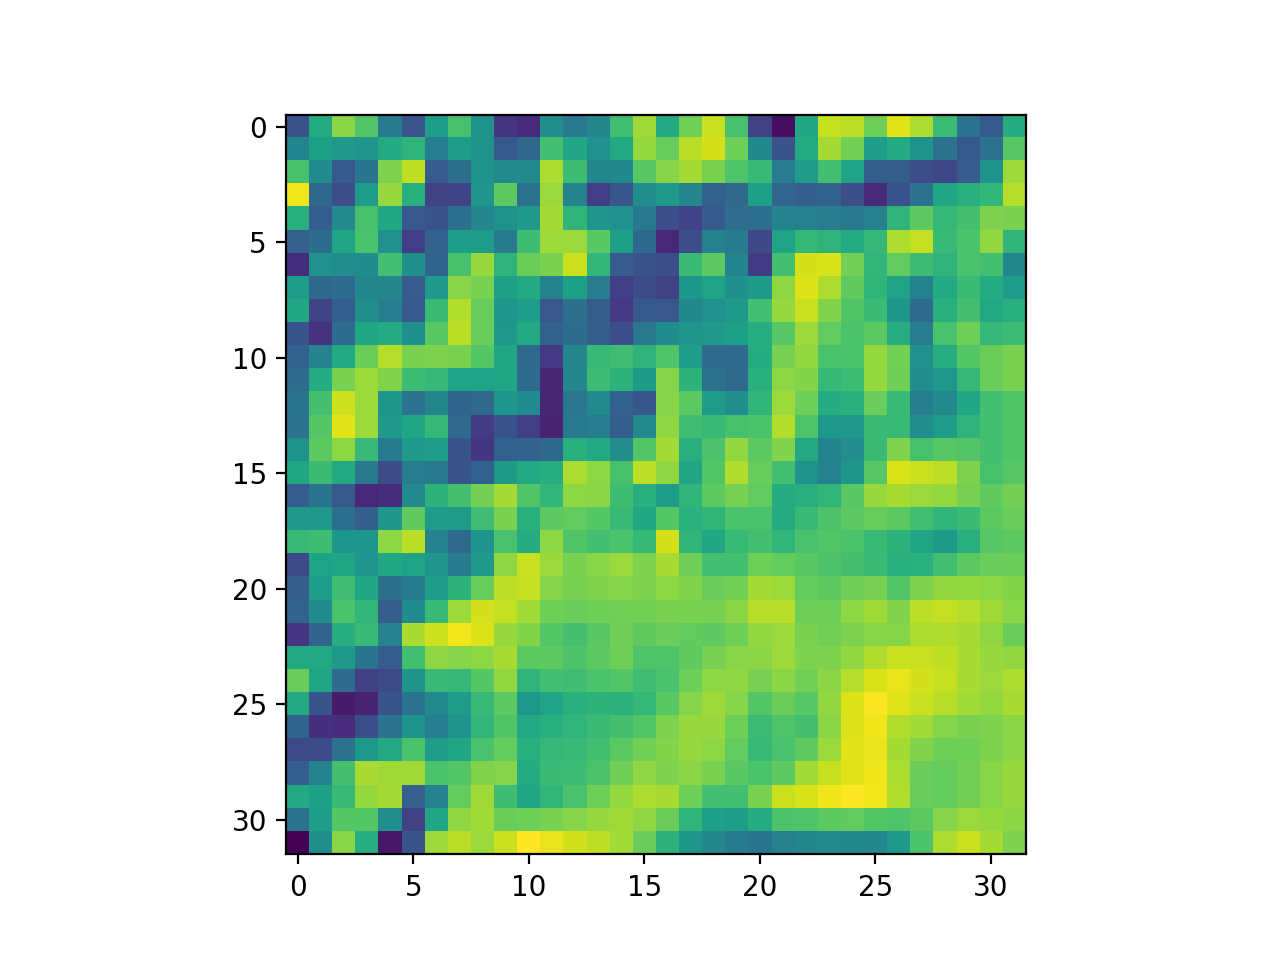

39 - 13


<IPython.core.display.Javascript object>


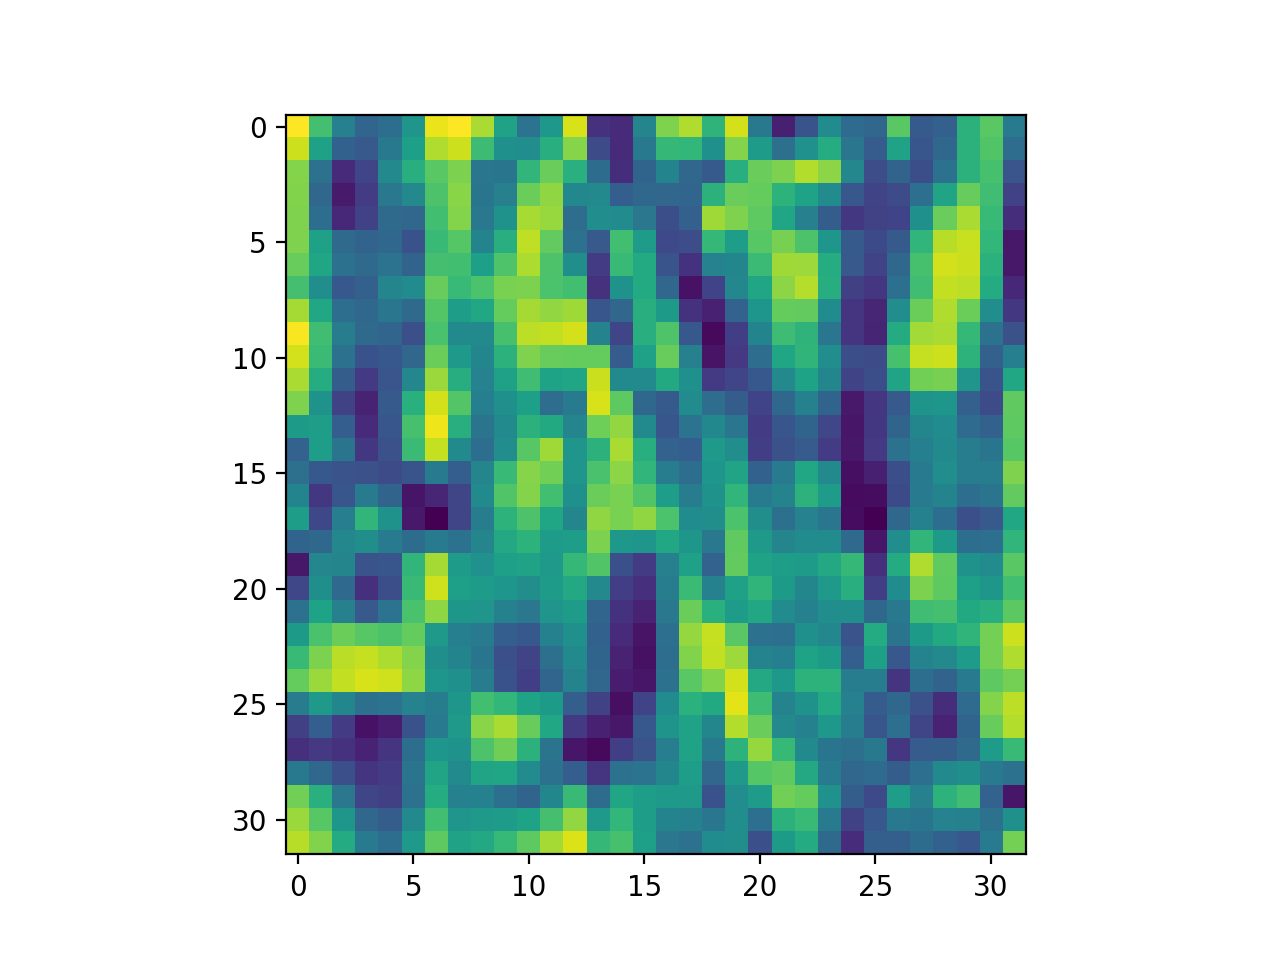

24 - 14


<IPython.core.display.Javascript object>


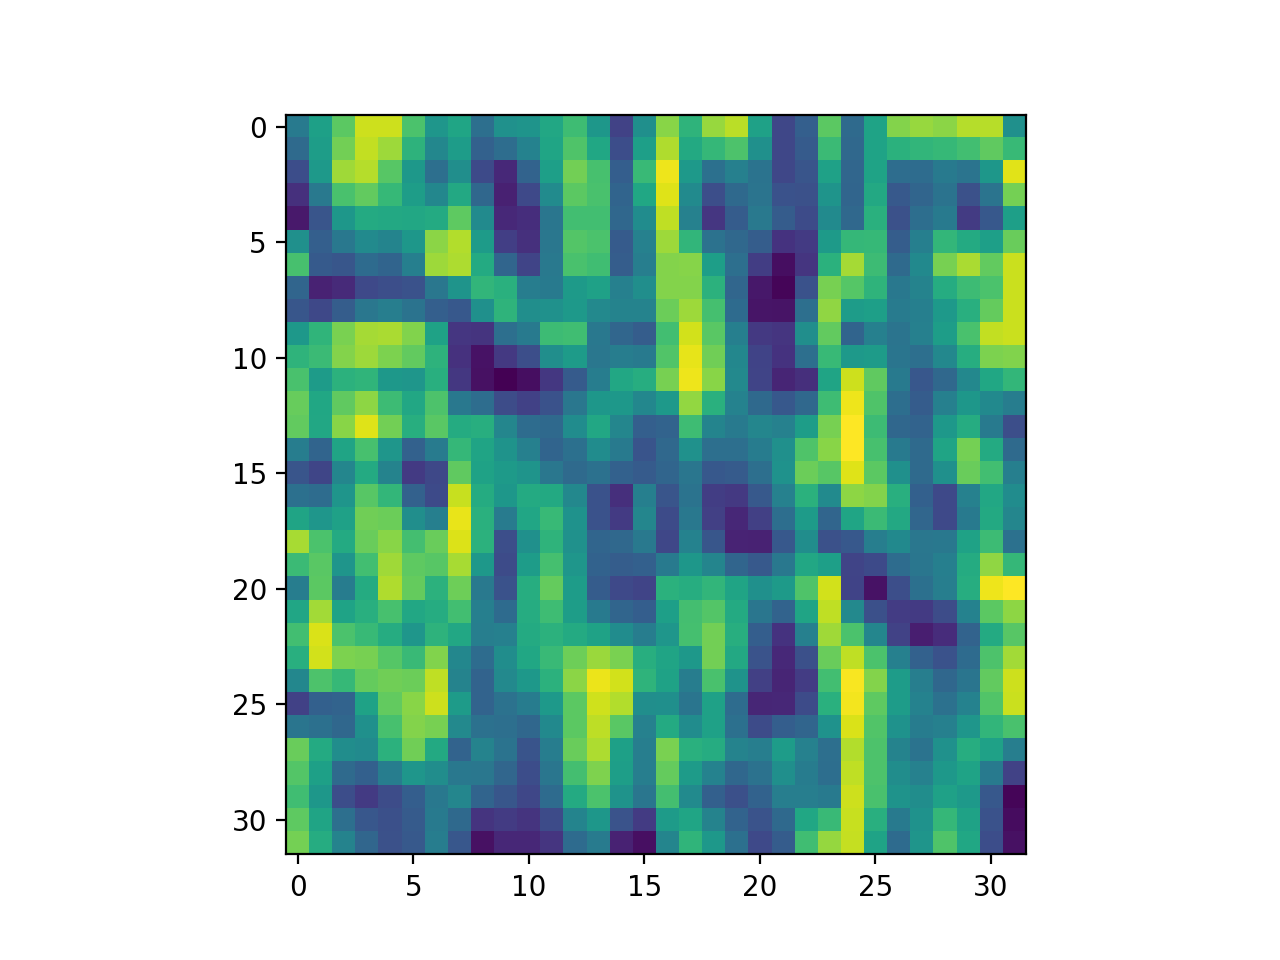

40 - 15


<IPython.core.display.Javascript object>


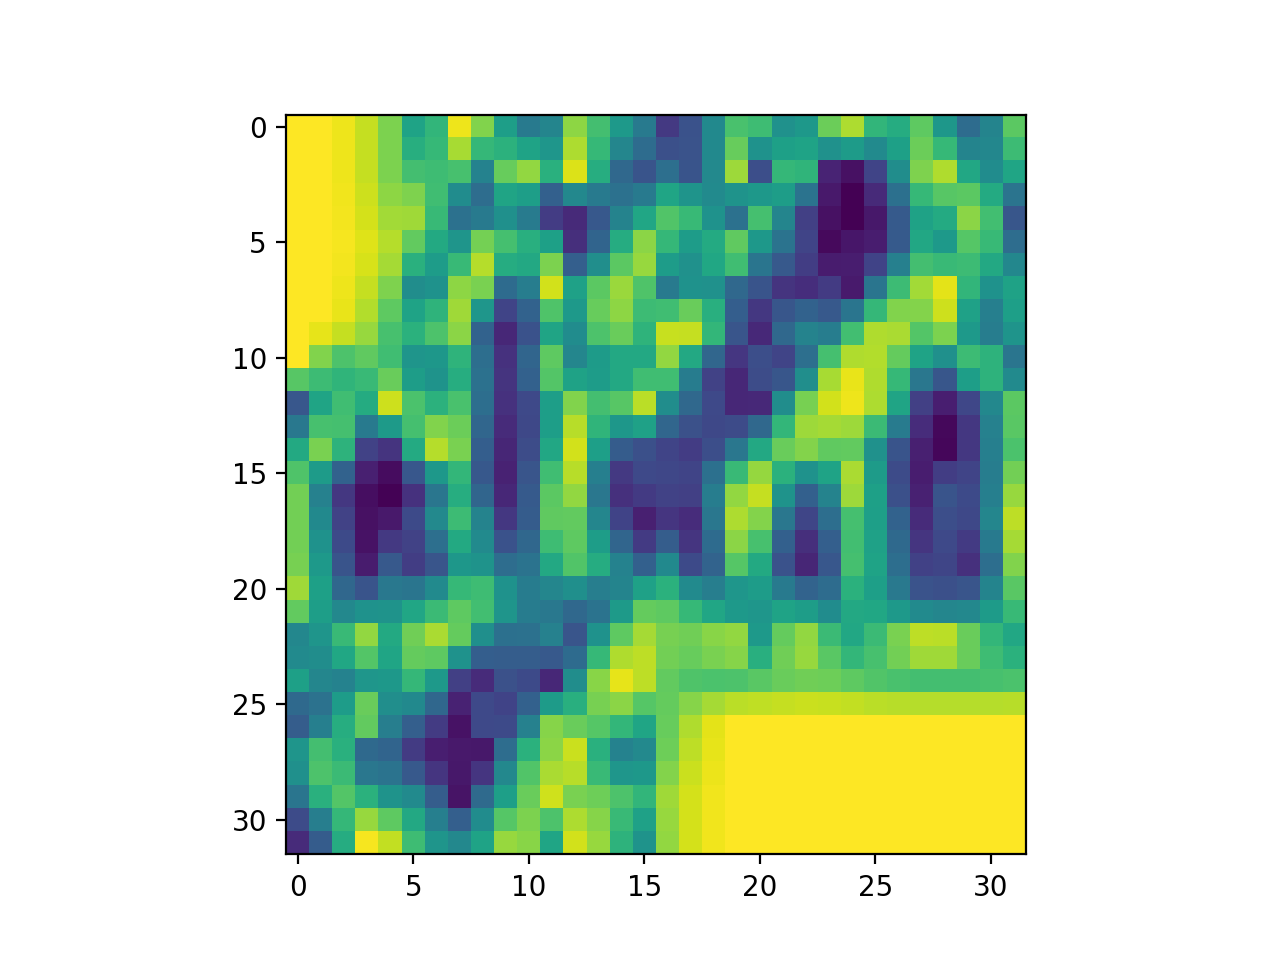

6 - 16


<IPython.core.display.Javascript object>


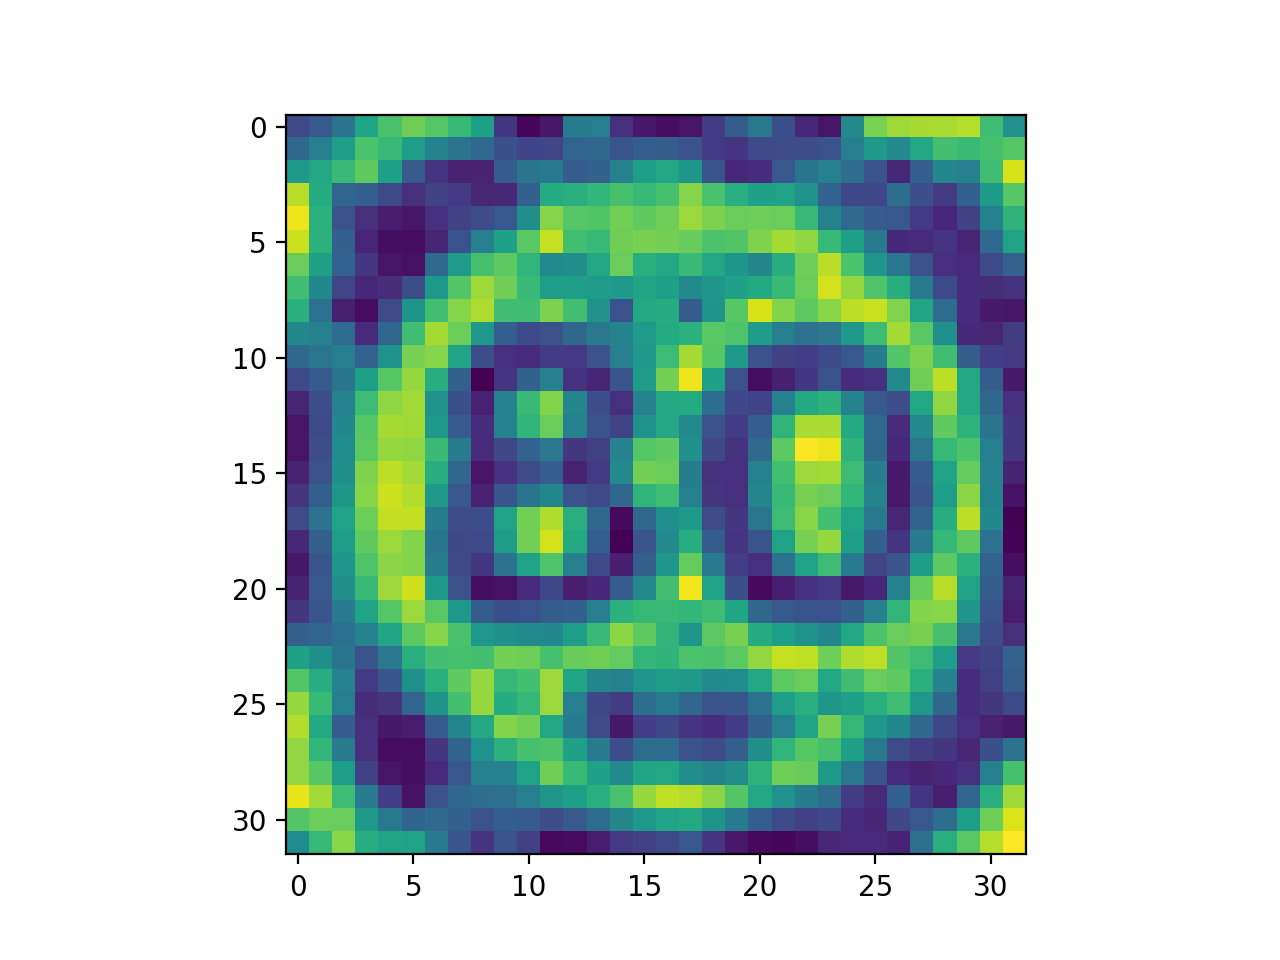

6 - 17


<IPython.core.display.Javascript object>


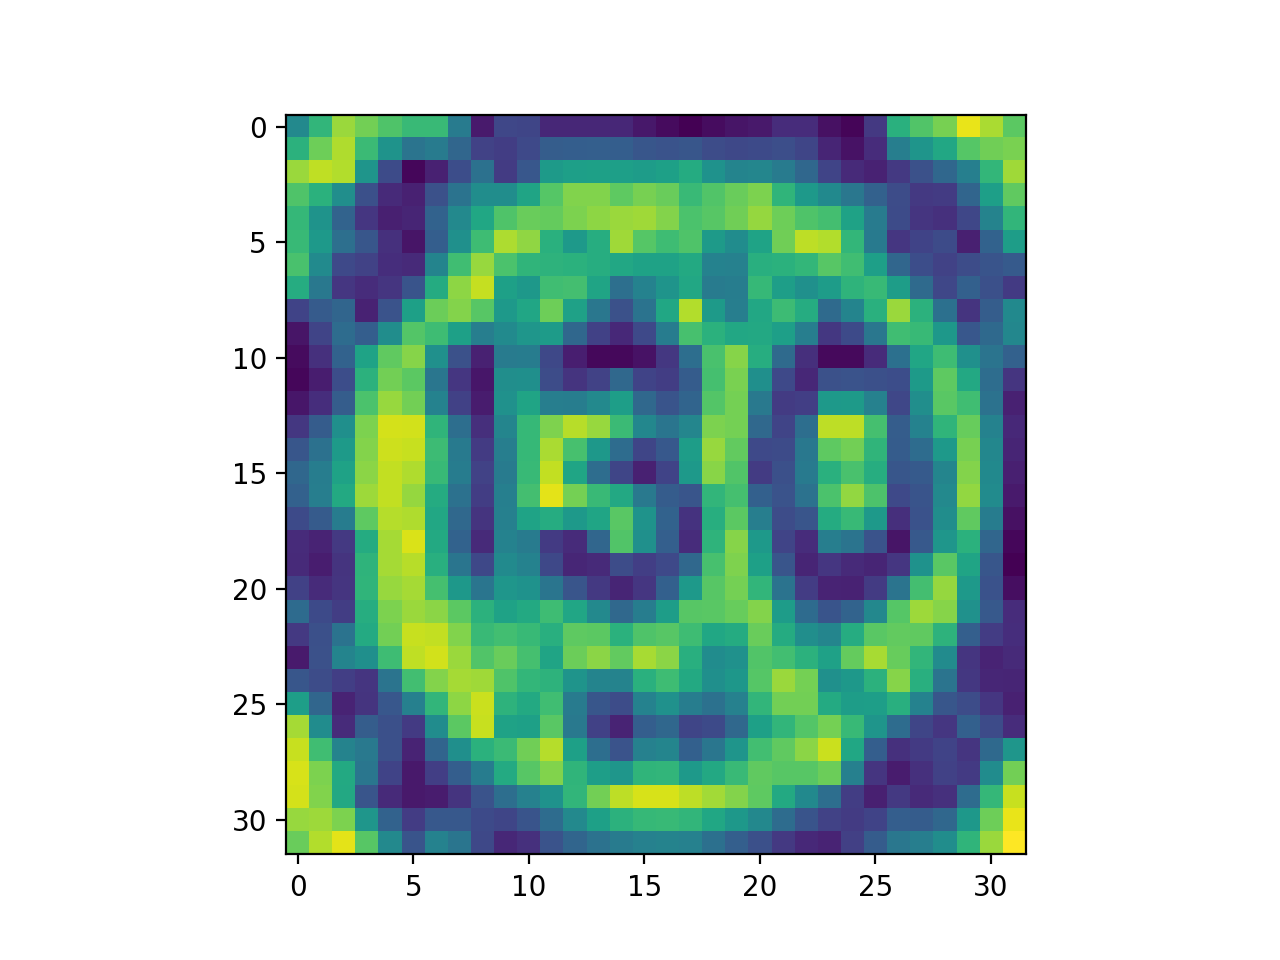

37 - 20


<IPython.core.display.Javascript object>


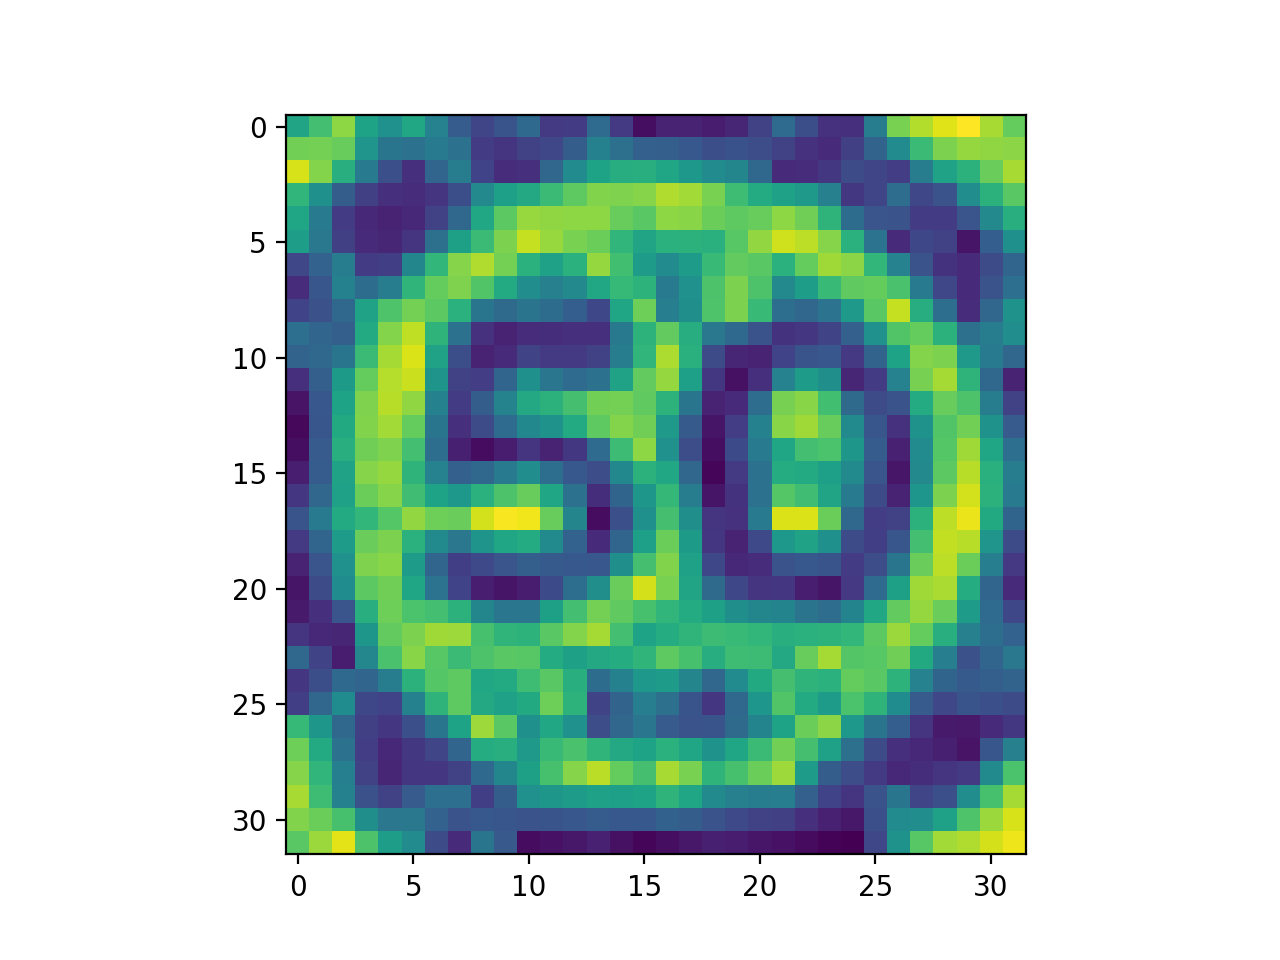

1 - 22


<IPython.core.display.Javascript object>


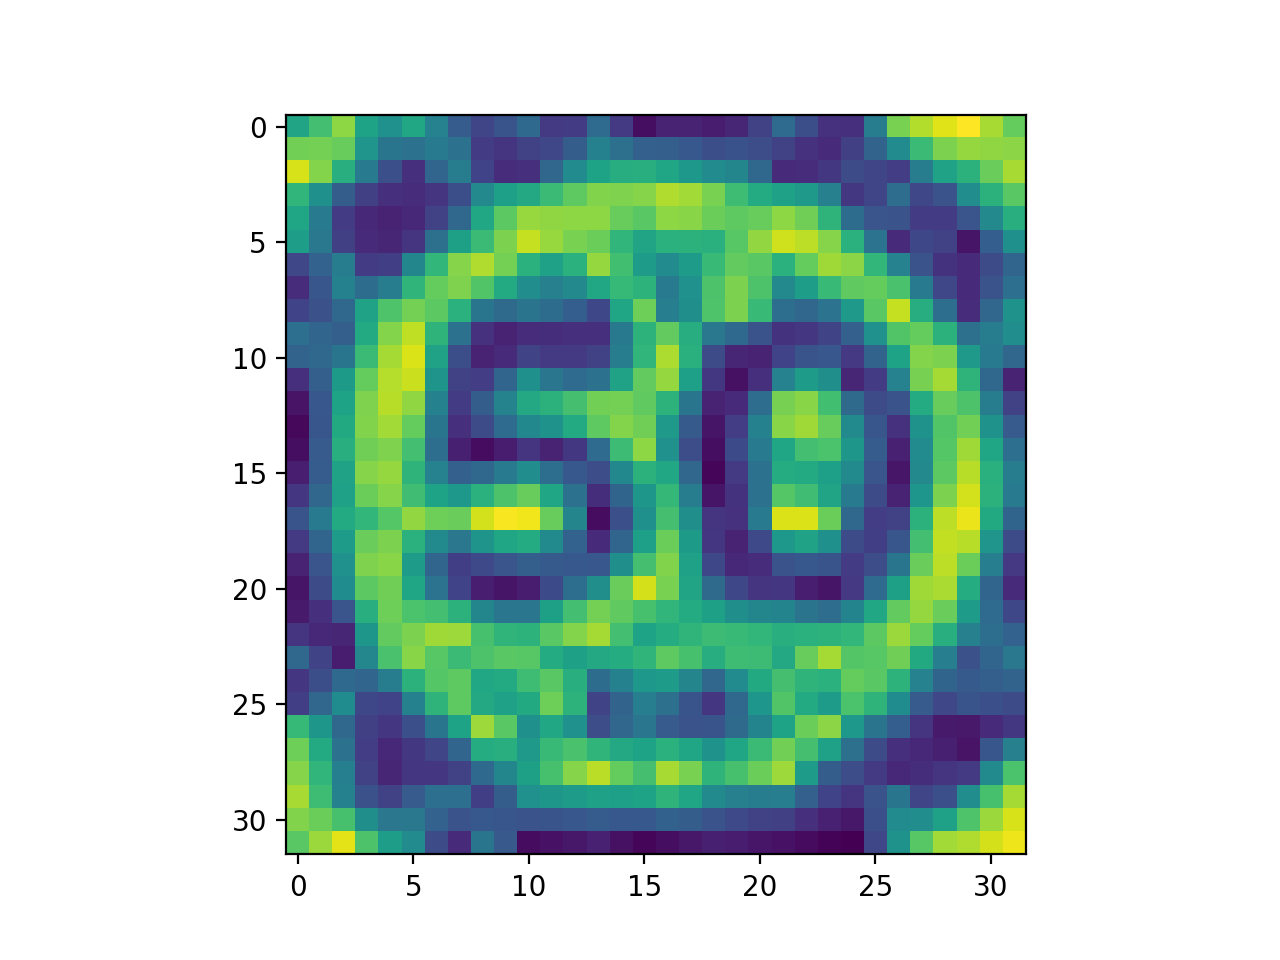

1 - 23


<IPython.core.display.Javascript object>


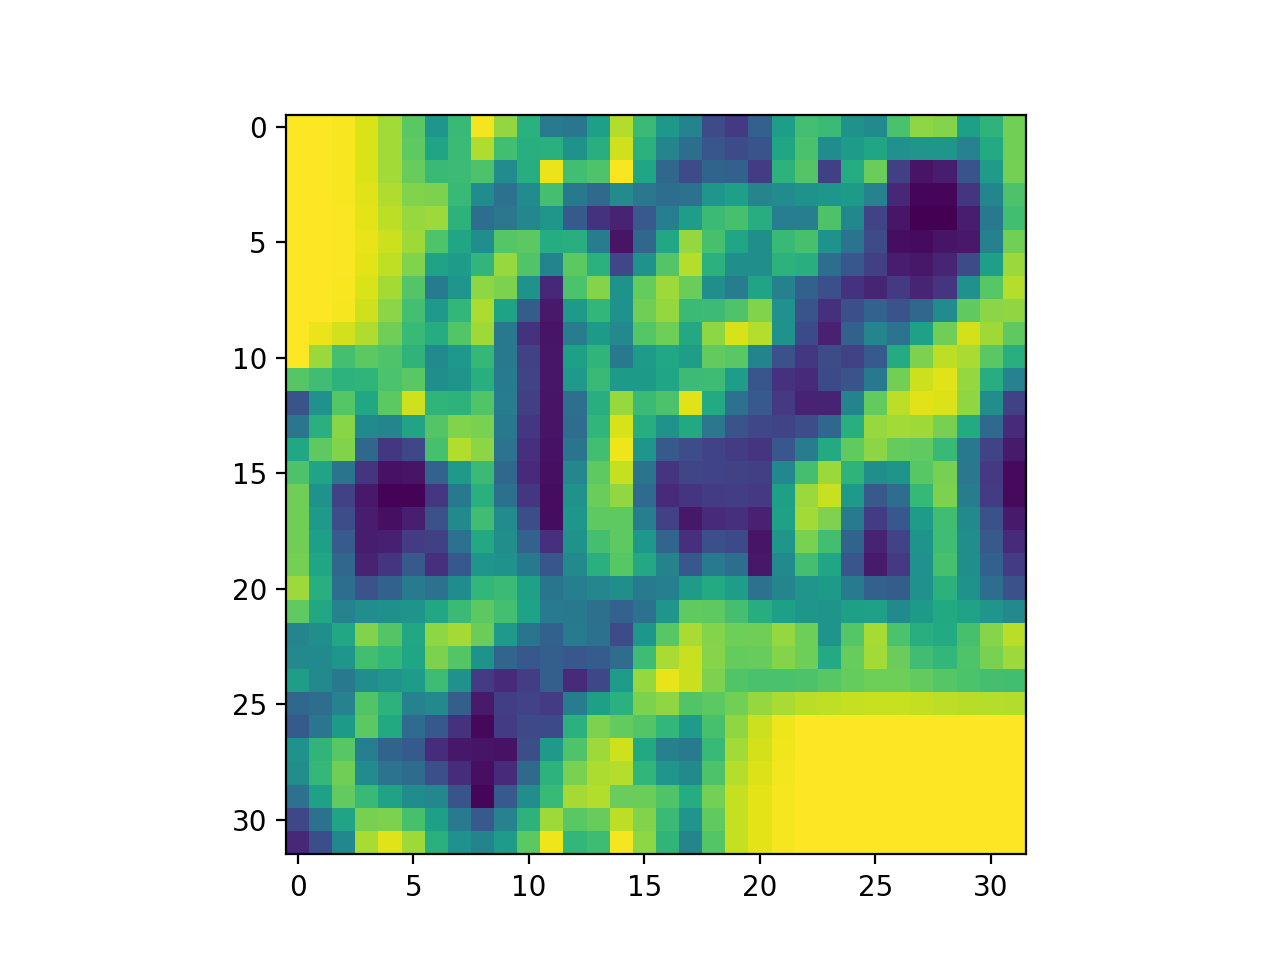

6 - 24


In [71]:
ans = []
par=0.01
for i in range(len(conts)):
    peri = cv2.arcLength(contours[conts[i,5]], True)
    approx = cv2.approxPolyDP(contours[conts[i,5]], 0.04 * peri, True)
    if(len(approx)==4 or len(approx)==6 or len(approx)==3 or len(approx)==8):
        
        check = img1.copy()
        check = check[int(conts[i,1] - conts[i,3]*par)  : int(conts[i,1] + conts[i,3] + conts[i,3]*par) , int(conts[i,0] - conts[i,2]*par) : int(conts[i,0] + conts[i,2] + conts[i,2]*par)]
        
        

        
        labs = cv2.cvtColor(check, cv2.COLOR_RGB2LAB)

        lab_planes = cv2.split(labs)

        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))

        lab_planes[0] = clahe.apply(lab_planes[0])

        labs = cv2.merge(lab_planes)

        check = cv2.cvtColor(labs, cv2.COLOR_LAB2RGB)
        
        
 

        
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        
#         print(img.shape)
        
        check = pre(check)
        
        
        check = cv2.resize(check, (32, 32))
        
        plt.figure(i)
        plt.imshow(check)
        
        
        check = np.array(check).reshape(-1, 32, 32, 1)
        
        
        print(np.argmax(model.predict(check)),"-",i)
        ans.append(model.predict(check))
    
    

In [271]:
r = np.unique(ans, return_counts= True)

In [272]:
r[0][np.argmax(r[1])]

14

In [59]:
ans2=[]
for i in range(len(ans)):
    ans3 = list(ans[i])
    
    ans2.append((np.argmax(ans3[0]),ans3[0][np.argmax(ans[i])]))

In [60]:
ans2,

([(40, 0.81061643),
  (38, 0.71561027),
  (38, 0.71561027),
  (2, 0.8737159),
  (24, 0.85213923),
  (40, 0.48719102)],)

In [6]:
def isRed(pix):
    
    h,s,v = pix
    
    if((s>145 ) and ((h>=0 and h<10) or (h>150 and h<190))):
        
        return True
    
    return False



def isYellow(pix):
    
    h,s,v = pix
    
    if((s>145 ) and  (h>17 and h<31)):
        
        return True
    
    return False
    
    
def isBlue(pix):
    
    h,s,v = pix
    
    if((s>160 ) and  (h>102 and h<115)):
        
        return True
    
    return False

In [21]:
def checkcolor(imgcolor):
    
    
    
    
    #imgcolor = cv2.GaussianBlur(imgcolor, (3,3), 0)
    
    
    lab = cv2.cvtColor(imgcolor, cv2.COLOR_RGB2LAB)
    
    lab_planes = cv2.split(lab)
    
    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(10,10))
    
    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    imgcolor = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
   
    imgHSV = cv2.cvtColor(imgcolor, cv2.COLOR_RGB2HSV)
    
    
    thresh = np.zeros(imgcolor.shape[:2])
    
    for i in range(imgcolor.shape[0]):
        for j in range(imgcolor.shape[1]):
            thresh[i,j] = thresh[i,j] or isRed(imgHSV[i,j])
            thresh[i,j] = thresh[i,j] or isBlue(imgHSV[i,j])
            thresh[i,j] = thresh[i,j] or isYellow(imgHSV[i,j]) 
            
    per = np.sum(thresh)/(thresh.shape[1]*thresh.shape[0])
    
#     plt.imshow(thresh)
    
    return per

In [19]:
ansss = checkcolor(imgthresh)